In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd '/content/gdrive/My Drive/Colab Notebooks/DSC DL Class/'

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/DSC DL Class


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten #,Dropout
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from tensorflow.keras import datasets

In [5]:
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)
# Image shape = batch, height, width, channel

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


(None, ((10000, 28, 28), (10000,)))

# Reshape data and scale by dividing by 255
so range will be 0 - 1.0 instead of min max scaler


In [10]:

# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255

Explore Data

In [11]:
print('No. of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

No. of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


Data Visualization

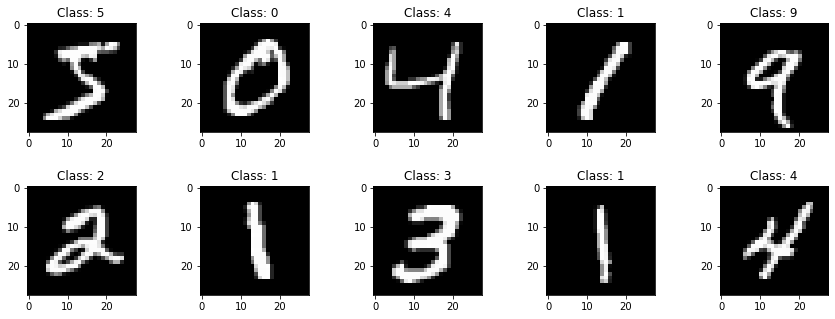

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
ax = axes.ravel()
for i in range(10):
  ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
  ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

View image in more detail

# Model Architecture

In [14]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
# Input layer of 28x28 = 784
model.add(Dense(784, kernel_initializer= 'he_uniform', activation="relu"))
# Hidden layers
model.add(Dense(256, kernel_initializer = 'glorot_normal', activation='relu'))
model.add(Dense(64, kernel_initializer = 'he_normal', activation='relu'))
# Output layer of 10 ie 10 classes
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=20)

In [18]:
model.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1906 - accuracy: 0.9422 - val_loss: 0.1222 - val_accuracy: 0.9621
Epoch 2/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0848 - accuracy: 0.9738 - val_loss: 0.1040 - val_accuracy: 0.9692
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 4/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0727 - val_accuracy: 0.9800
Epoch 5/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 6/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0771 - val_accuracy: 0.9797
Epoch 7/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0686 - val_ac

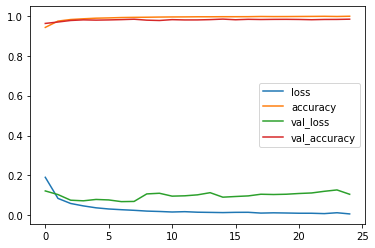

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Prediction and Evaluation

In [22]:
predictions = model.predict_classes(X_test)
f1 = f1_score(y_test, predictions, average ="micro")

pred = model.predict_proba(X_test)
roc = roc_auc_score(y_test, pred, multi_class = "ovo")

acc = accuracy_score(y_test, predictions)
err = 1 - acc

stats = pd.DataFrame({"Test accuracy" : round(acc*100, 3),
                      "F1 Score": round(f1*100, 3),
                      "ROC AUC score": round(roc*100,3),
                      "Test loss": round(err*100,3)},
                      index= [0])
stats.head()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


,Test accuracy,F1 Score,ROC AUC score,Test loss
0,98.34,98.34,99.962,1.66


# Testing model on new image
- from our test set

In [27]:
sample_one = np.expand_dims(X_test[105], axis=[0])

model.predict_classes(sample_one)

array([9])

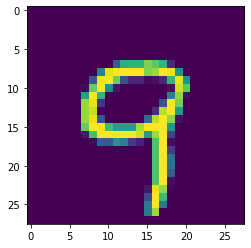

In [24]:
plt.imshow(X_test[105].reshape(28,28))